In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


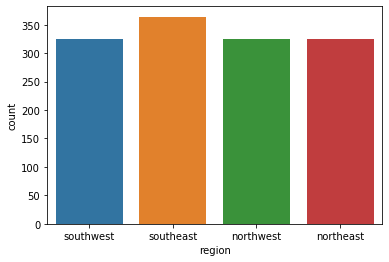

In [5]:
sns.countplot(data.region)

In [6]:
#encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [7]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

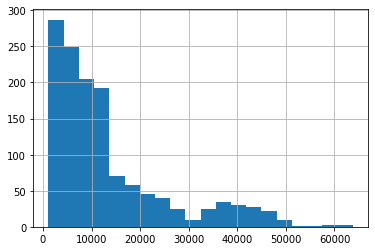

In [8]:
data.charges.hist(bins=20)

In [9]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

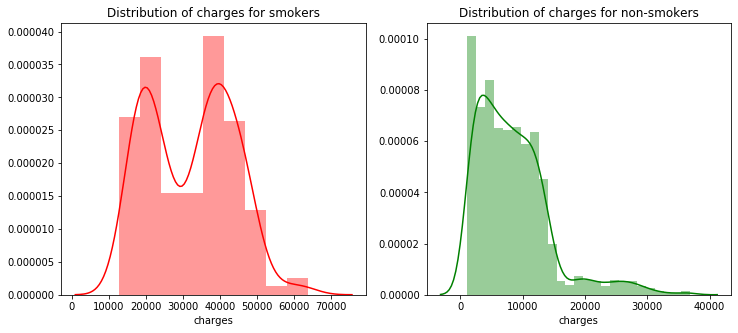

In [10]:
fig = plt.figure(figsize=(12,5))
fig1 = fig.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]['charges'],color='r',ax=fig1)
fig1.set_title('Distribution of charges for smokers')
fig1 = fig.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='g',ax=fig1)
fig1.set_title('Distribution of charges for non-smokers')

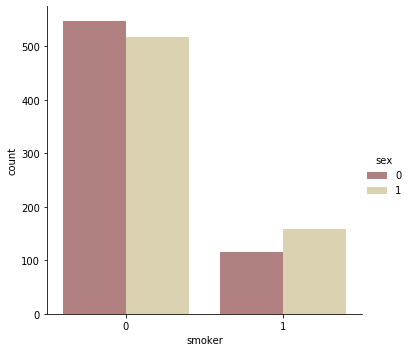

In [11]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)


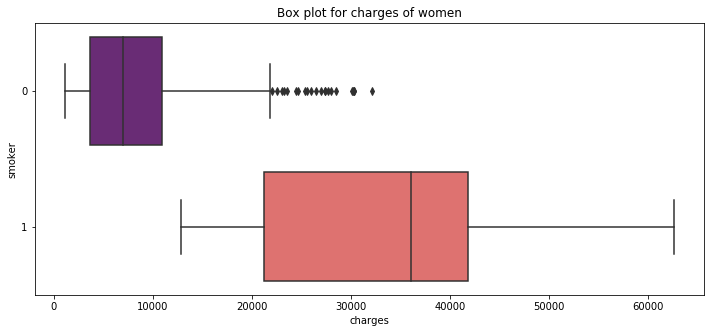

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')


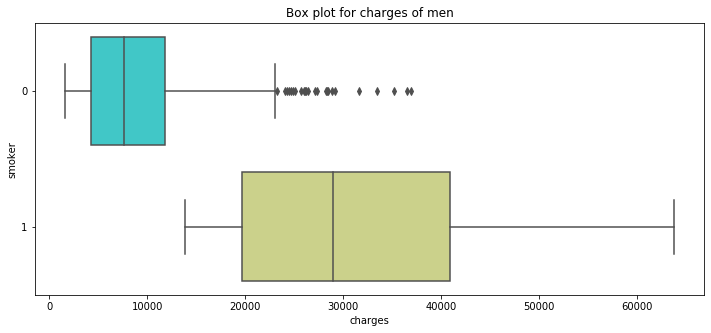

In [13]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

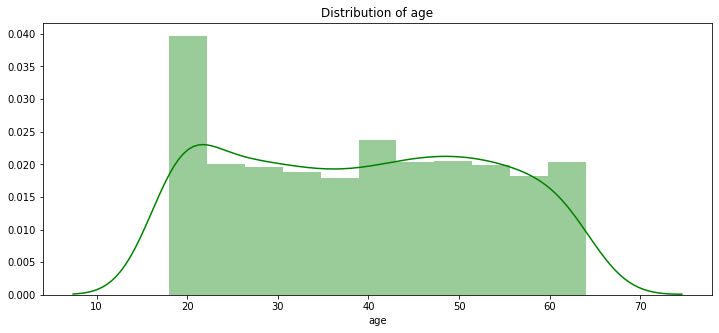

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')


Text(0.5, 1, 'Smokers and non-Smokers at 18')

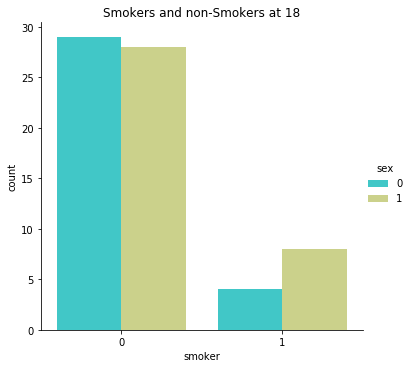

In [15]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='rainbow',data=data[(data.age==18)])
plt.title('Smokers and non-Smokers at 18')

Text(0.5, 1.0, 'Charges for 18 years old smokers')

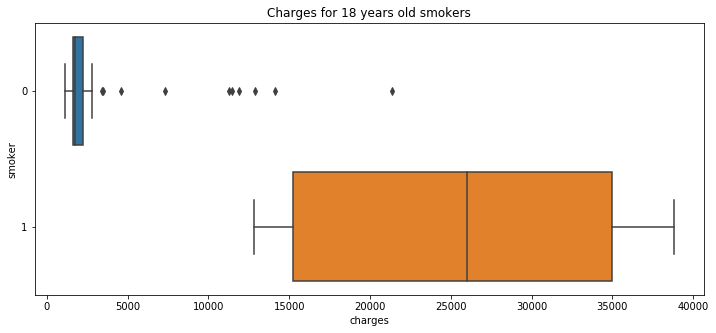

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x='charges',y='smoker',data=data[(data.age==18)],orient='h')
plt.title('Charges for 18 years old smokers')

Text(0.5, 1.0, 'Distribution of charges according to age for non-smokers')

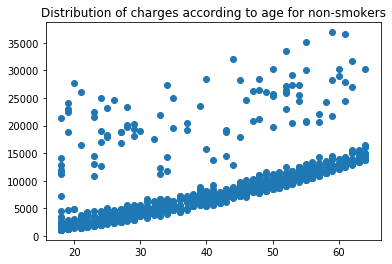

In [17]:
plt.scatter(data[(data.smoker==0)].age,data[(data.smoker==0)].charges,marker='o')
plt.title('Distribution of charges according to age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges according to age for non-smokers')

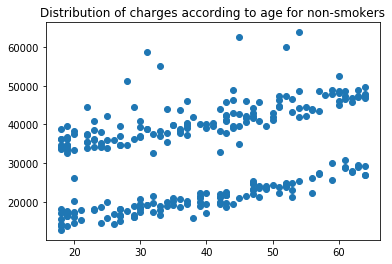

In [18]:
plt.scatter(data[(data.smoker==1)].age,data[(data.smoker==1)].charges,marker='o')
plt.title('Distribution of charges according to age for non-smokers')

## *Charges increase with age for non-smokers unlike smokers*

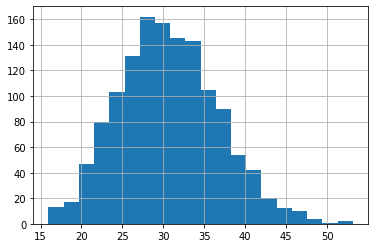

In [19]:
data['bmi'].hist(bins=20)

## *person having BMI of 30 or more is considered to be overweight*


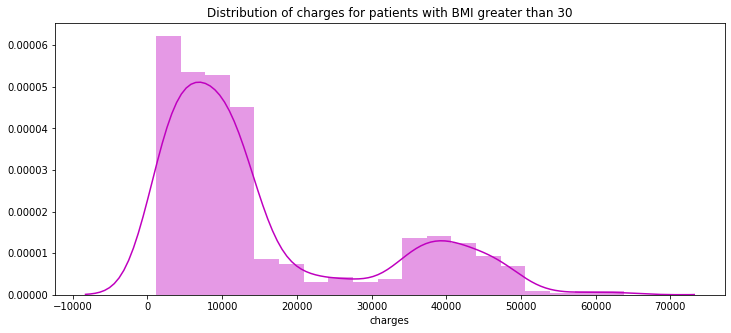

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')


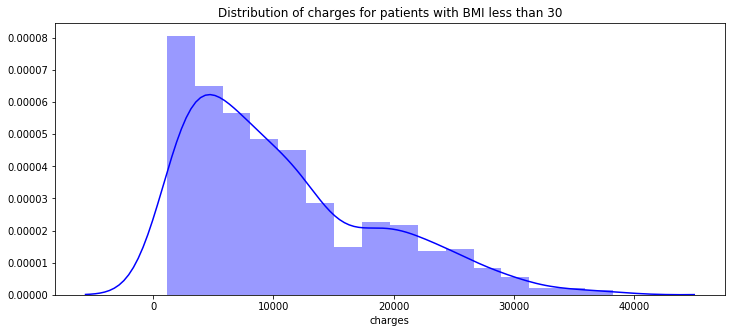

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')


## *Patients with BMI above 30 spend more on treatment*

Text(0.5, 1.0, 'Charges vs BMI')

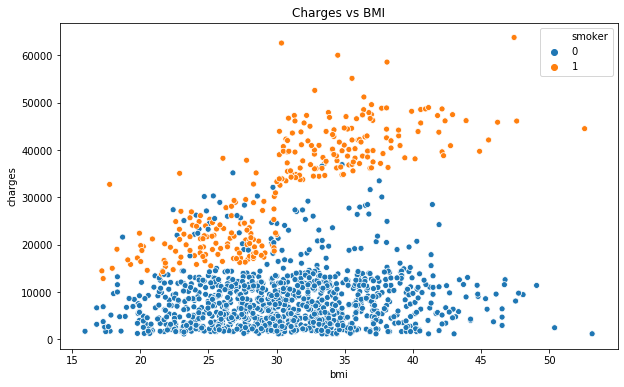

In [22]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,hue='smoker')
ax.set_title('Charges vs BMI')

## *Smoking and high BMI is bad for your pocket*

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1,
                              oob_score = True)
forest.fit(x_train,y_train)
forest_test_pred = forest.predict(x_test)
print('R2 Score', r2_score(y_test,forest_test_pred))
print('OOB Score: ', forest.oob_score_)


R2 Score 0.8733833973969799
OOB Score:  0.8121503732941051
